In [13]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

#LOAD DATA

In [14]:
#Load master dataframe
df = pd.read_json("../data/census_zillow_subway_yelp_data.json")
df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
df.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'STATION', u'STATION_DISTANCE', u'USPS', u'ZIPCODE', u'average_rating_restaurants_chinese', u'average_rating_restaurants_cuban', u'average_rating_restaurants_greek', u'average_rating_restaurants_indpak', u'average_rating_restaurants_italian', u'average_rating_restaurants_japanese', u'average_rating_restaurants_latin', u'average_rating_restaurants_mexican', u'average_rating_restaurants_newamerican', u'average_rating_restaurants_puertorican', u'average_rating_restaurants_tradamerican', u'average_rating_restaurants_vegetarian', u'closed_number_restaurants_chinese', u'closed_number_restaurants_cuban', u'closed_number_restaurants_greek', u'closed_number_restaurants_indpak', u'closed_number_restaurants_italian', u'closed_number_restaurants_japanese', u'closed_number_restaurants_latin', u'closed_number_r

In [15]:
def first_element(x):
    return x.iloc[0]
dfzip = df.groupby('ZIPCODE').apply(sum)
dfzip2 = df.groupby('ZIPCODE').apply(np.mean)
dfzip3 = df.groupby('ZIPCODE').apply(first_element)
dfzip['FRAC_LAND'] = dfzip['ALAND'] / (dfzip['ALAND'] + dfzip['AWATER'])
dfzip['INTPTLAT'] = dfzip2['INTPTLAT']
dfzip['INTPTLONG'] = dfzip2['INTPTLONG']
dfzip['fraction_latino'] = dfzip['pop_latino']/dfzip['pop_total']
dfzip['fraction_asian'] = dfzip['pop_asian']/dfzip['pop_total']
dfzip['fraction_white'] = dfzip['pop_white']/dfzip['pop_total']
dfzip['fraction_black'] = dfzip['pop_black']/dfzip['pop_total']
dfzip['pop_density'] = dfzip['transient_residential_pop'] / dfzip['ALAND']
dfzip['hhmean'] = dfzip2['hhmean']
dfzip['hhmedian'] = dfzip2['hhmedian']
dfzip['house_median'] = dfzip2['house_median']
dfzip['house_index'] = dfzip2['house_index']
dfzip['median_owned'] = dfzip2['median_owned']
dfzip['median_rent'] = dfzip2['median_rent']
dfzip['BOROUGH'] = dfzip3['BOROUGH']
len(df)
#del df
dfzip = dfzip.drop(0,axis=0)
df = dfzip

#ADD ADDITIONAL FEATURES

In [16]:
#Add additional test features
df['fraction_asian'] = (df['pop_asian'] / df['pop_total'])
df['fraction_latino'] = (df['pop_latino'] / df['pop_total'])
df['fraction_white'] = (df['pop_white'] / df['pop_total'])
df['fraction_black'] = (df['pop_black'] / df['pop_total'])
df['pop_density'] = df['transient_residential_pop'] / df['ALAND']
df['number_restaurants'] = df['number_restaurants_chinese'] + df['number_restaurants_cuban'] + \
df['number_restaurants_greek'] + df['number_restaurants_indpak'] + df['number_restaurants_italian'] + \
df['number_restaurants_japanese'] + df['number_restaurants_latin'] + df['number_restaurants_mexican'] + \
df['number_restaurants_newamerican'] + df['number_restaurants_puertorican'] + df['number_restaurants_tradamerican'] + \
df['number_restaurants_vegetarian']
df['number_restaurants_capita'] = 1000.0 * (df['number_restaurants'] / df['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)
df['number_restaurants_capita_chinese'] = 1000.0 * (df['number_restaurants_chinese'] / df['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)  

In [17]:
#Add additional test features
dfzip['number_restaurants'] = dfzip['number_restaurants_chinese'] + dfzip['number_restaurants_cuban'] + \
dfzip['number_restaurants_greek'] + dfzip['number_restaurants_indpak'] + dfzip['number_restaurants_italian'] + \
dfzip['number_restaurants_japanese'] + dfzip['number_restaurants_latin'] + dfzip['number_restaurants_mexican'] + \
dfzip['number_restaurants_newamerican'] + dfzip['number_restaurants_puertorican'] + dfzip['number_restaurants_tradamerican'] + \
dfzip['number_restaurants_vegetarian']
dfzip['number_restaurants_capita'] = 1000. * (dfzip['number_restaurants'] / dfzip['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)
dfzip['number_restaurants_capita_chinese'] = 1000. * (dfzip['number_restaurants_chinese'] / dfzip['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)  

In [18]:
df['number_restaurants_capita_chinese']

ZIPCODE
10001    0.464063
10002    0.389293
10003    0.161310
10004    0.000000
10005    0.000000
10007    1.035541
10009    0.105006
10010    0.098758
10011    0.173915
10012    0.083090
10013    0.860026
10014    0.231664
10016    0.268986
10017    0.165758
10018    0.457096
10019    0.084919
10021    0.173183
10022    0.202938
10023    0.061303
10024    0.025079
10025    0.044573
10026    0.100440
10027    0.112896
10028    0.184007
10029    0.378254
10030    0.038657
10031    0.075657
10032    0.172948
10033    0.114588
10034    0.348668
           ...   
11412    0.066602
11413    0.033935
11414    0.394963
11415    0.465353
11416    0.210129
11417    0.151188
11418    0.131872
11419    0.284374
11420    0.213664
11421    0.101575
11422    0.141606
11423    0.039254
11424    0.182381
11425    0.000000
11426    0.044488
11427    0.121659
11428    0.028668
11429    0.117571
11430    4.725898
11432    0.205707
11433    0.181180
11434    0.138217
11435    0.133701
11436    0.100980
11

(0, 60)

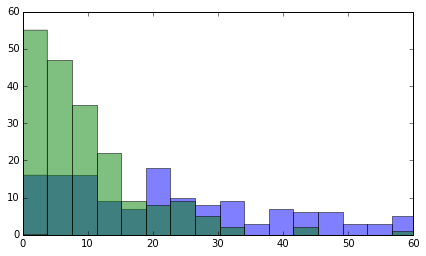

In [19]:
mpl.rcParams['figure.figsize'] = (7,4)
n, bins, patches = plt.hist(np.array(df['number_restaurants']),bins=100,alpha=0.5);
plt.hist(np.array(df['number_restaurants_chinese']),bins=bins,alpha=0.5);
plt.xlim([0,60])
#df['number_restaurants_capita_chinese']

In [20]:
#Check that all features are available
df.head(3)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_index,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,0,0,0.042111,0.265458,0.660092,0.032161,0.043566,76,5.038404,0.464063
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,0,0,0.287305,0.387337,0.345783,0.080577,0.056028,172,1.487966,0.389293
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,0,0,0.076578,0.139669,0.760993,0.048017,0.096014,268,2.543007,0.161310


#Load yelp api dataframe

In [21]:
yelp = pd.read_json("../data/yelp/yelp_api_data.json")
with open("../data/yelp/yelp_api_data.json") as fp:
    json1_str = fp.read() 
    yelp = json.loads(json1_str)

In [22]:
cuisine_types = yelp.keys()
cuisine_types

['puertorican',
 'cuban',
 'latin',
 'mexican',
 'chinese',
 'vegetarian',
 'indpak',
 'japanese',
 'greek',
 'tradamerican',
 'newamerican',
 'italian']

##Restrict analysis to subset of data
<li>Chinese restaurants</li>
<li>Census tracts where number of restaurants is != 0</li>
<li>Census tracts where fraction of land mass > 0.8</li>
<strong>Rationale: Areas with NO restaurants at all may be zoned completely residential. While lacking access to zoning data, this is best heuristic.</strong>

In [23]:
dfsub = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants_chinese'] >= 0.0),:]
print len(dfsub)," rows after clearing census tracts partially under water"
dfsub = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants'] > 0.0),:]
dfsub2 = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants_chinese'] > 0.0),:]
print len(dfsub)," rows after clearing census tracts without any restaurants"
dfsub.head(5)

183  rows after clearing census tracts partially under water
179  rows after clearing census tracts without any restaurants


,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_index,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,0,0,0.042111,0.265458,0.660092,0.032161,0.043566,76,5.038404,0.464063
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,0,0,0.287305,0.387337,0.345783,0.080577,0.056028,172,1.487966,0.389293
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,0,0,0.076578,0.139669,0.760993,0.048017,0.096014,268,2.543007,0.161310
10007,312722,0.121,0,0.000,Manhattan,1.000000,36061001300,40.709109,-74.012980,40.711627,...,0,0,0.091367,0.163930,0.742055,0.044756,0.018528,31,5.350296,1.035541
10009,1625274,0.627,1072262,0.414,Manhattan,0.602503,360610028607,40.724099,-73.977759,407.262230,...,0,0,0.257295,0.153121,0.593852,0.073497,0.046876,131,1.719478,0.105006


###Cuisine Type = Chinese

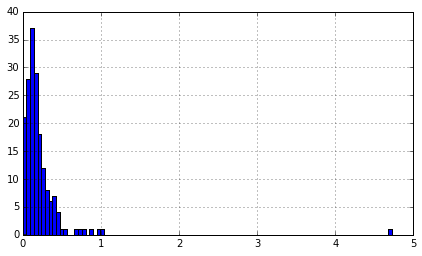

In [24]:
mpl.rcParams['figure.figsize'] = (7,4)
dfsub['number_restaurants_capita_chinese'].hist(bins=100)
#dfsub.columns

In [25]:
dfsub[dfsub['number_restaurants_capita_chinese'] > 1.0]

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_index,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10007,312722,0.121,0,0.000,Manhattan,1.000000,36061001300,40.709109,-74.012980,40.711627,...,0,0,0.091367,0.163930,0.742055,0.044756,0.018528,31,5.350296,1.035541
11430,18965408,7.322,1117804,0.432,Queens,0.944341,72162156202,40.656409,-73.801364,81.336459,...,0,0,0.527410,0.210775,0.246692,0.090737,0.000056,48,45.368620,4.725898


In [26]:
cuisine_type = "chinese"

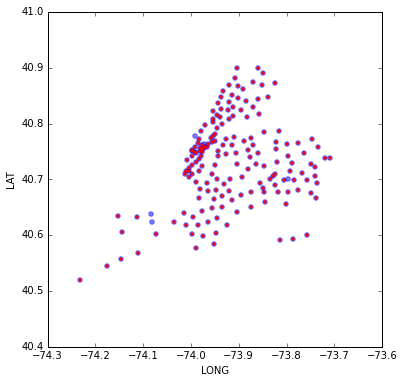

In [27]:
mpl.rcParams["figure.figsize"] = (6,6)
plt.scatter(dfsub["INTPTLONG"],dfsub["INTPTLAT"],s=20,color="blue",alpha=0.5)
plt.scatter(dfsub2["INTPTLONG"],dfsub2["INTPTLAT"],s=5,color="red")
plt.xlabel("LONG"); plt.ylabel("LAT")

#Linear Model - Feature Selection

In [28]:
pred_features = ['pop_density','STATION_DISTANCE','hhmedian','median_owned','median_rent','pop_asian','pop_black','pop_indpak','pop_latino','pop_total','pop_white','transient_pop','transient_residential_pop','fraction_asian','fraction_latino']

In [29]:
nfeatures = len(pred_features)
print plt.style.available
plt.style.use('ggplot')

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


In [30]:
import matplotlib.gridspec as gridspec
def create_feature_matrix(dataframe,feature_list,feature_cuisine,single_feature=False):

    np.set_printoptions(precision=8)
    
    #get size of matrix
    ncols = len(feature_list)
    nrows = len(dataframe)
        
    if single_feature == True:
        X_ = np.array(dataframe[feature_list].astype('float'))
        X_ = X_[:,np.newaxis]
    else:
        X = []
        for feature in feature_list:
            A = np.array(dataframe[feature].astype('float'))
            X.append(A)    
        X_ = np.vstack(X).T
    
    Y = np.array(dataframe[feature_cuisine].astype('float'))
    Y = Y[:,np.newaxis]
    X_ = np.nan_to_num(X_)
    
    return np.matrix(X_), np.matrix(Y)

###Number of Chinese Restaurants as a function of each Feature

pop_density         : 0.0003
STATION_DISTANCE    : 0.0056
hhmedian            : 0.0113
median_owned        : 0.0175
median_rent         : 0.0020
pop_asian           : 0.5291
pop_black           : 0.0019
pop_indpak          : 0.0279
pop_latino          : 0.0558
pop_total           : 0.2197
pop_white           : 0.1290
transient_pop       : 0.0990
transient_residential_pop: 0.2550
fraction_asian      : 0.1565
fraction_latino     : 0.0008


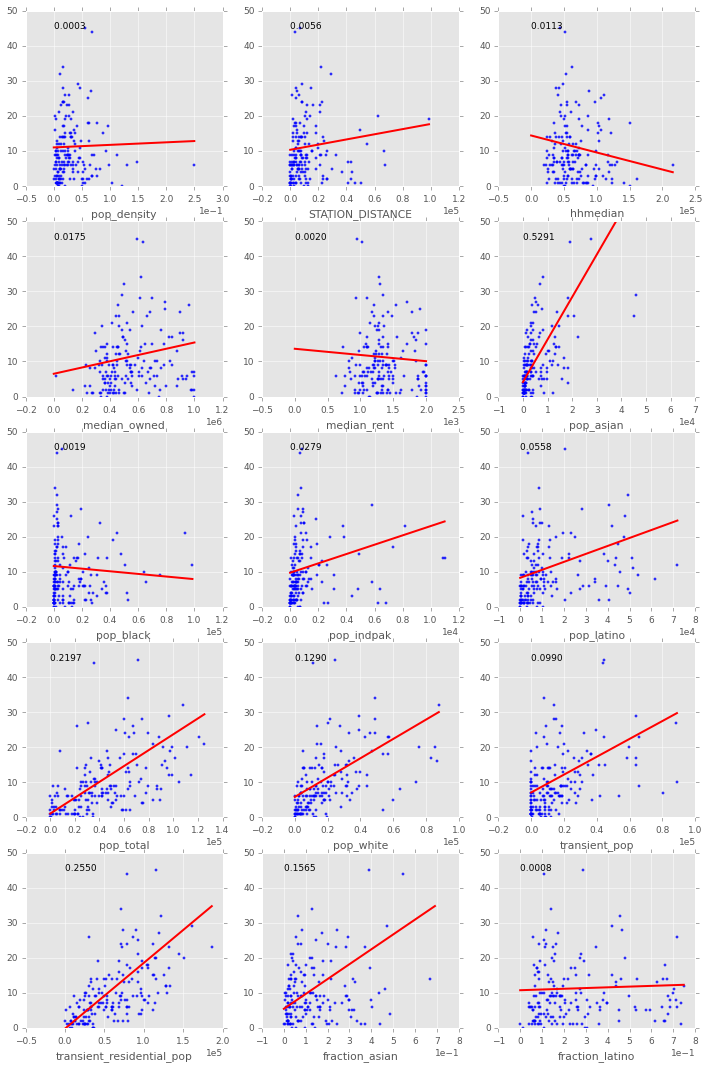

In [31]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score

mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (12,22)
gs = gridspec.GridSpec(6, 3)
cuisine_type = "chinese"
fig = plt.figure()
for i,feature in enumerate(pred_features):
    ax = fig.add_subplot(gs[i])
    feature_cuisine = "number_restaurants_"+cuisine_type
    ax.scatter(dfsub[feature],dfsub[feature_cuisine],s=5,alpha=0.8,color="blue")
    ax.set_xlabel(feature)
    ax.set_ylim([0,50])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1)) 

    X_, y_ = create_feature_matrix(dfsub,feature,feature_cuisine,single_feature=True)

    clf = linear_model.LinearRegression()
    clf.fit(X_,y_)
    R2 = clf.score(X_,y_)
    
    #plot best-fit line 
    xline = np.linspace(X_.min(),X_.max(),100)
    yline = clf.predict(xline[:,np.newaxis])
    
    ax.plot(xline,yline,color='red',ls='-',lw=2)
    
    ax.text(X_.min(),45,"{0:<7.4f}".format(R2))

    #EVS = explained_variance_score(y_, clf.predict(X_))
    
    print "{0:20s}: {1:<6.4f}".format(feature, R2)

pop_density         : 0.0063
STATION_DISTANCE    : 0.0040
hhmedian            : 0.0023
median_owned        : 0.0085
median_rent         : 0.0124
pop_asian           : 0.0141
pop_black           : 0.0276
pop_indpak          : 0.0014
pop_latino          : 0.0121
pop_total           : 0.0175
pop_white           : 0.0033
transient_pop       : 0.0062
transient_residential_pop: 0.0190
fraction_asian      : 0.0583
fraction_latino     : 0.0013


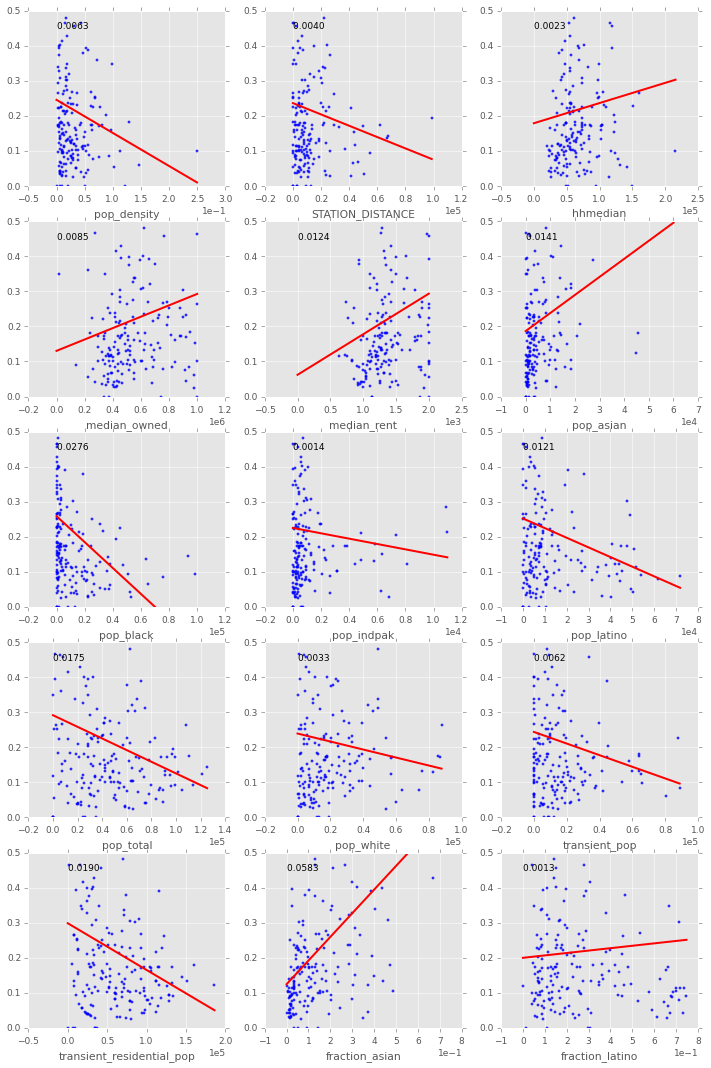

In [32]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (12,22)
gs = gridspec.GridSpec(6, 3)
cuisine_type = "chinese"
fig = plt.figure()
for i,feature in enumerate(pred_features):
    ax = fig.add_subplot(gs[i])
    feature_cuisine = "number_restaurants_capita_"+cuisine_type
    ax.scatter(dfsub[feature],dfsub[feature_cuisine],s=5,alpha=0.8,color="blue")
    ax.set_xlabel(feature)
    ax.set_ylim([0,0.5])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))
    
    X_, y_ = create_feature_matrix(dfsub,feature,feature_cuisine,single_feature=True)

    clf = linear_model.LinearRegression()
    clf.fit(X_,y_)
    R2 = clf.score(X_,y_)
    
    #plot best-fit line 
    xline = np.linspace(X_.min(),X_.max(),100)
    yline = clf.predict(xline[:,np.newaxis])
    
    ax.plot(xline,yline,color='red',ls='-',lw=2)
    ax.text(0,0.45,"{0:<7.4f}".format(R2))

    #EVS = explained_variance_score(y_, clf.predict(X_))
    
    print "{0:20s}: {1:<6.4f}".format(feature, R2)

#Linear Regression, All Features

In [33]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
pred_features = ['pop_density','STATION_DISTANCE','hhmedian','median_owned',
                 'median_rent','pop_asian','pop_black','pop_indpak',
                 'pop_latino','pop_total','pop_white','transient_pop',
                 'transient_residential_pop','fraction_asian','fraction_latino']
#pred_features = ['transient_residential_pop','pop_asian','pop_chinese']
feature_cuisine = "number_restaurants_"+"chinese"
X_, y_ = create_feature_matrix(dfsub,pred_features,feature_cuisine,single_feature=False)

In [34]:
from sklearn import metrics
clf_linear = linear_model.LinearRegression()
clf_linear.fit(X_,y_)
R2_linear = clf_linear.score(X_,y_)
print "Linear Regression R^2 = ",R2_linear
yfit_linear = clf_linear.predict(X_)
#print "MSE = ",metrics.mean_squared_error(y_,clf.predict(X_))
from sklearn.metrics import mean_squared_error
print np.sqrt(mean_squared_error(y_,yfit_linear))

Linear Regression R^2 =  0.652442316626
8.53144346906


#Lasso Regression

In [35]:
for alpha in np.logspace(-6,0.5,5):
    clf_lasso = linear_model.Lasso(alpha=alpha)
    clf_lasso.fit(X_,y_)
    R2_lasso = clf_lasso.score(X_,y_)
    print "Lasso Regression R^2 = ",R2_lasso," ,alpha = ",alpha

Lasso Regression R^2 =  0.65244231661  ,alpha =  1e-06
Lasso Regression R^2 =  0.652442287986  ,alpha =  4.21696503429e-05
Lasso Regression R^2 =  0.65239138606  ,alpha =  0.00177827941004
Lasso Regression R^2 =  0.646839381056  ,alpha =  0.0749894209332
Lasso Regression R^2 =  0.646837303773  ,alpha =  3.16227766017


/Users/deneb/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:490: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [36]:
yfit_lasso = clf_lasso.fit(X_,y_)

#Ridge Regression

In [37]:
for alpha in np.logspace(-6,0.5,5):
    clf_ridge = linear_model.Ridge(alpha=alpha)
    clf_ridge.fit(X_,y_)
    R2_ridge = clf_ridge.score(X_,y_)
    print "Ridge Regression R^2 = ",R2_ridge," ,alpha = ",alpha

Ridge Regression R^2 =  0.652442316626  ,alpha =  1e-06
Ridge Regression R^2 =  0.65244231608  ,alpha =  4.21696503429e-05
Ridge Regression R^2 =  0.652441396497  ,alpha =  0.00177827941004
Ridge Regression R^2 =  0.652069227789  ,alpha =  0.0749894209332
Ridge Regression R^2 =  0.648654752691  ,alpha =  3.16227766017


In [38]:
mpl.rcParams['figure.figsize'] = (8,4)
yfit_ridge = clf_ridge.fit(X_,y_)

#Lasso Lars Regression: Best if alpha->0 ie regular Linear Regression

In [39]:
clf_lassolars = linear_model.LassoLars(alpha=0.1,verbose=True)
clf_lassolars.fit(X_,y_)
R2_lassolars = clf_lassolars.score(X_,y_)
yfit_lassolars = clf_lassolars.predict(X_)
print "Lasso Lars Regression R^2 = ",R2_lassolars  #highest R2 when alpha->0

Lasso Lars Regression R^2 =  0.592824291448


##Deviation between Prediction and Data

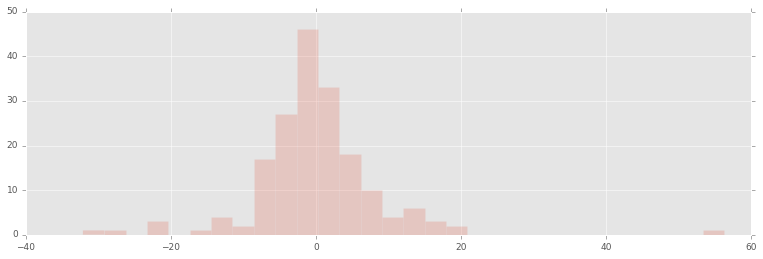

In [54]:
mpl.rcParams['figure.figsize'] = (13,4)
yfit_linear = np.ravel(clf_linear.predict(X_))
yfit_lasso = np.ravel(clf_lasso.predict(X_))
yfit_ridge = np.ravel(clf_ridge.predict(X_))
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, patches = ax1.hist(np.ravel(y_)-yfit_linear,bins=30,alpha=0.2);
ax.set_xlabel("Number of Chinese Restaurants")
#ax1.hist(np.ravel(y_)-yfit_ridge,bins=bins,alpha=0.2);
#ax2 = fig.add_subplot(122)
#ax2.hist(np.ravel(y_)-yfit_lasso,bins=bins,alpha=0.2);
#ax2.hist(np.ravel(y_)-yfit_linear,bins=bins,alpha=0.2);

In [41]:
dx_linear = np.ravel(y_)-yfit_linear
dx_lasso = np.ravel(y_)-yfit_lasso
dx_ridge = np.ravel(y_)-yfit_ridge
dx_lassolars = np.ravel(y_)-yfit_lassolars

In [42]:
stddev_linear = np.std(dx_linear)
stddev_lasso = np.std(dx_lasso)
stddev_ridge = np.std(dx_ridge)
stddev_lassolars = np.std(dx_lassolars)

In [43]:
print stddev_linear
print stddev_lasso
print stddev_ridge
print stddev_lassolars

8.53144346906
8.59996101265
8.57780387274
9.23421540192


In [44]:
len(yfit_linear), len(dfsub)

(179, 179)

## Random Forest

In [45]:
#Random Forest and Ensemble Classifiers
from sklearn import ensemble

In [46]:
clf_rf = ensemble.RandomForestRegressor(n_estimators=10,max_depth=7,verbose=1)
clf_rf.fit(X_,np.ravel(np.array(y_)))
yfit_rf = clf_rf.predict(X_)
R2_rf = clf_rf.score(X_,np.ravel(np.array(y_)))
print "R2 Random Forest = ",R2_rf

R2 Random Forest =  0.937101118101


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [47]:
#How does R2 change with max depth?
max_depth_list = np.arange(15) + 1
R2_rf_list = []
for depth in max_depth_list:
    clf_rf_tmp = ensemble.RandomForestRegressor(n_estimators=10,max_depth=depth,verbose=1)
    clf_rf_tmp.fit(X_,np.ravel(np.array(y_)))
    yfit_rf_tmp = clf_rf_tmp.predict(X_)
    R2_rf_list.append(clf_rf_tmp.score(X_,np.ravel(np.array(y_))))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: 

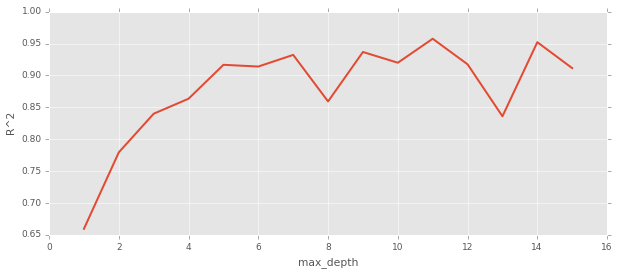

In [48]:
mpl.rcParams["figure.figsize"] = (10,4)
plt.plot(max_depth_list,R2_rf_list,lw=2)
plt.xlabel("max_depth")
plt.ylabel("R^2")

In [49]:
#How does R2 change with number estimators
number_estimators_list = np.arange(1,30)
R2_rf_list_2 = []
for n in number_estimators_list:
    clf_rf_tmp = ensemble.RandomForestRegressor(n_estimators=n,max_depth=depth,verbose=1)
    clf_rf_tmp.fit(X_,np.ravel(np.array(y_)))
    yfit_rf_tmp = clf_rf_tmp.predict(X_)
    R2_rf_list_2.append(clf_rf_tmp.score(X_,np.ravel(np.array(y_))))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: 

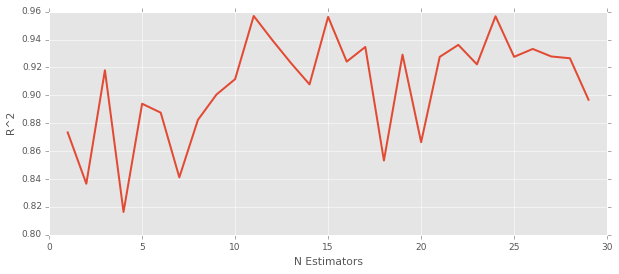

In [50]:
mpl.rcParams["figure.figsize"] = (10,4)
plt.plot(number_estimators_list,R2_rf_list_2,lw=2)
plt.xlabel("N Estimators")
plt.ylabel("R^2")

##In conclusion want roughly ~ 5+ estimators (10 is ok), and max_depth >= 7.

In [101]:
#Repeat from before, but with n = 10 and max_depth = 7
clf_rf = ensemble.RandomForestRegressor(n_estimators=10,max_depth=7,verbose=1)
clf_rf.fit(X_,np.ravel(np.array(y_)))
yfit_rf = clf_rf.predict(X_)
R2_rf = clf_rf.score(X_,np.ravel(np.array(y_)))
print "R2 Random Forest = ",R2_rf

R2 Random Forest =  0.875433317904


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [102]:
dx_rf = np.ravel(np.array(y_)) - yfit_rf
zip(clf_rf.feature_importances_,pred_features)

[(0.021670103915957951, 'pop_density'),
 (0.0095731097059789886, 'STATION_DISTANCE'),
 (0.016644397185221784, 'hhmedian'),
 (0.016058636514924323, 'median_owned'),
 (0.0083337750640534829, 'median_rent'),
 (0.58624714915177845, 'pop_asian'),
 (0.007947254729459452, 'pop_black'),
 (0.015016543395367361, 'pop_indpak'),
 (0.029114096068101874, 'pop_latino'),
 (0.003957358773109293, 'pop_total'),
 (0.031036719634941402, 'pop_white'),
 (0.011255071193425292, 'transient_pop'),
 (0.14483907692908526, 'transient_residential_pop'),
 (0.091940075353035527, 'fraction_asian'),
 (0.006366632385559433, 'fraction_latino')]

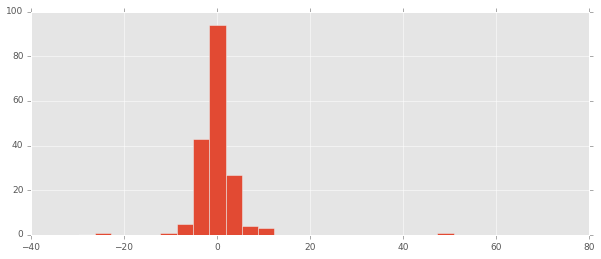

In [103]:
plt.hist(dx_rf,bins=bins);

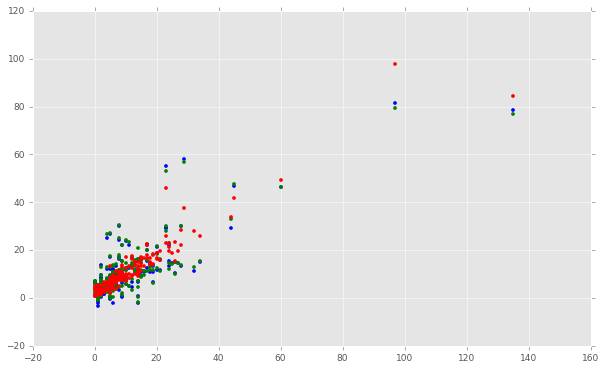

In [104]:
#Plot true vs predicted for the four models
mpl.rcParams["figure.figsize"] = (10,6)
plt.scatter(y_,yfit_linear,s=10,color="blue")
plt.scatter(y_,yfit_lasso,s=10,color="green")
plt.scatter(y_,yfit_rf,s=10,color="red")

In [105]:
dx_linear = np.ravel(y_)-yfit_linear
dx_lasso = np.ravel(y_)-yfit_lasso
dx_ridge = np.ravel(y_)-yfit_ridge
dx_lassolars = np.ravel(y_)-yfit_lassolars
dx_rf = np.ravel(y_) - yfit_rf

In [51]:
plt.scatter(dx_linear,dx_rf,s=10,color="black")
plt.plot([-100,100],[-100,100],lw=2,ls="--",color="blue")
plt.axis([-30,30,-30,30])
plt.xlabel("Deviation Linear Model")
plt.ylabel("Deviation RF Model")

NameError: name 'dx_rf' is not defined